In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#loading data from csv file
raw_mail_data = pd.read_csv('mail_data.csv')

In [3]:
print(raw_mail_data )

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [4]:
#replacing null values with null stream
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [5]:
#printing first 5 rowa
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#checking rows and cols in dataframe
mail_data.shape


(5572, 2)

lable encoding

In [7]:
#lable span mail as 0, and ham mail as 1
# mail_data.loc[mail_data['Category']=='spam','Catagory']=0 not worked, this not change the orogunal data
# mail_data.loc[mail_data['Category']=='ham','Catagory']=1 not worked , this not change the orogunal data
mail_data['Category'] = mail_data['Category'].replace({'spam': 0, 'ham': 1})
mail_data


,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


spam -> 0
ham -> 1

In [8]:
#seprating the data as text and labels
print(mail_data)
x=mail_data['Message']
y=mail_data['Category']


      Category                                            Message
0            1  Go until jurong point, crazy.. Available only ...
1            1                      Ok lar... Joking wif u oni...
2            0  Free entry in 2 a wkly comp to win FA Cup fina...
3            1  U dun say so early hor... U c already then say...
4            1  Nah I don't think he goes to usf, he lives aro...
...        ...                                                ...
5567         0  This is the 2nd time we have tried 2 contact u...
5568         1               Will ü b going to esplanade fr home?
5569         1  Pity, * was in mood for that. So...any other s...
5570         1  The guy did some bitching but I acted like i'd...
5571         1                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [9]:
x


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [10]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64

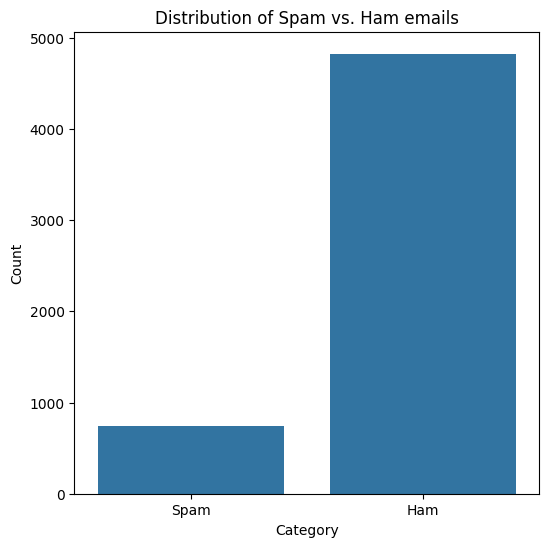

In [17]:
# 1. Distribution of Spam vs. Ham emails
plt.figure(figsize=(6, 6))
sns.countplot(x='Category', data=mail_data)
plt.title('Distribution of Spam vs. Ham emails')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Spam', 'Ham'])
plt.show()


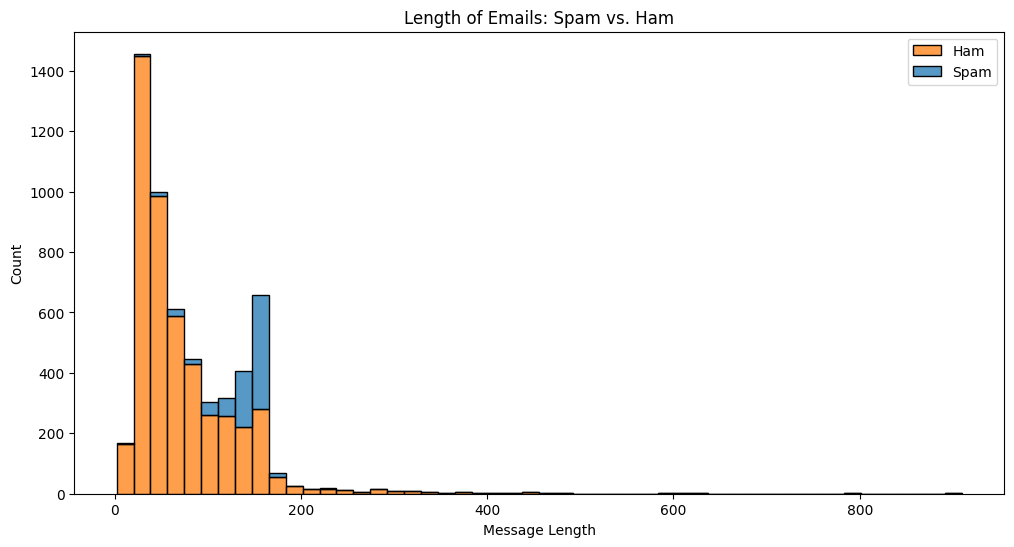

In [18]:
# 2. Length of Emails: Spam vs. Ham
mail_data['Message_Length'] = mail_data['Message'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(data=mail_data, x='Message_Length', hue='Category', multiple='stack', bins=50)
plt.title('Length of Emails: Spam vs. Ham')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.legend(['Ham', 'Spam'])
plt.show()

splitting up data in train data and test data

In [22]:
X_train, X_test, Y_train, Y_test =train_test_split(x,y,test_size=0.2,random_state=3)


In [23]:
print(x.shape)
print(X_train.shape)
print(X_test.shape)


(5572,)
(4457,)
(1115,)


### Feature extraction


#### Trasformation of test data to feature vectors that can used as imput data to the logistic regression

In [24]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

 # convert y train and y test values asw intergers
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')


In [25]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [26]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

Logistic Regression


In [27]:
model =LogisticRegression()
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)


LogisticRegression()


Evaluating the trained model

In [28]:
#prediction on tranning data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [30]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9670181736594121



Building a Predictive System

In [31]:
input_mail = ["Congratulations! You've Won a $1,000 Gift Card We are excited to inform you that you have been selected as the lucky winner of a $1,000 gift card! To claim your prize, simply click on the link below and complete the short survey."]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')


[0]
Spam mail


In [32]:
# Save the model and the feature extraction
import pickle


with open('spam_detector_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [33]:

with open('tfidf_vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(feature_extraction, vec_file)